
---

# DL HW2
 - Pretrained Models

In this assignment, you will analyze and compare a few pre-trained models from the field of computer vision.

The assignment is divided into several tasks:

- **EX1 - The Imagenette Dataset (10 pts)**  
- **EX2 - Pretrained Models (20 pts)**  
- **EX3 - Visualizing Feature Maps (30 pts)**  
- **EX4 - K-Nearest Neighbors (KNN) in the Embedding Space (50 pts)**  

Note: In this assignment, you will not train any models or aim to reach specific accuracy levels. Instead, you will investigate the behavior of a few pre-trained models.

---

## Grading

The grading for each section is indicated in the title. Grading will be based on the following criteria:

- **Following Instructions**  
- **Presentation**: Clear figures (with labels, titles, etc.), well-written discussions and comments, organized notebook, no leftover debugging prints, and no redundant functions.  
- **Clear and Efficient Code**: Your code should be clear and neat. Write clear comments and avoid `for loops` when vectorized operations are available. Use the GPU when possible.  
- **Discussion**: Ensure you write a discussion whenever it is required.  

---

Submit the fully executed notebook.

---


# EX1 - Imagenette (Small subset of ImageNet) Dataset (10pts)



1.   Download the ```Imagenette``` dataset from ```torchvision``` ([link](https://pytorch.org/vision/0.19/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette)). Make sure the set size="160px" to avoid long downloading time.
2. Preprocess the data - resize to 256x256 and take a central crop of size 224. ToTensor, Normalize and so on.
3. Describe the dataset: number of samples for each set, classes labels, classes labels distribtuion (are they balanced?)

4. Plot 5 random samples from each class a present them in a ```num_classes X 5``` (rows X columns) grid.






In [32]:
%pip install torchinfo

In [33]:
### Imports ###

import torch
from torchvision import datasets, transforms, models
from torchinfo import summary
import matplotlib.pyplot as plt
import numpy as np

In [15]:
### Preprocessing ###

# We will use the known mean and std of the ImageNet dataset for normalization
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

imagenette_train = datasets.Imagenette(
    download=True,
    root="./data",
    size="160px",
    split="train",
    transform=transform
)

imagenette_val = datasets.Imagenette(
    download=True,
    root="./data",
    size="160px",
    split="val",
    transform=transform
)

Number of train samples:  9469
Number of validation samples:  3925

Class labels: ['tench', 'English springer', 'cassette player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute']



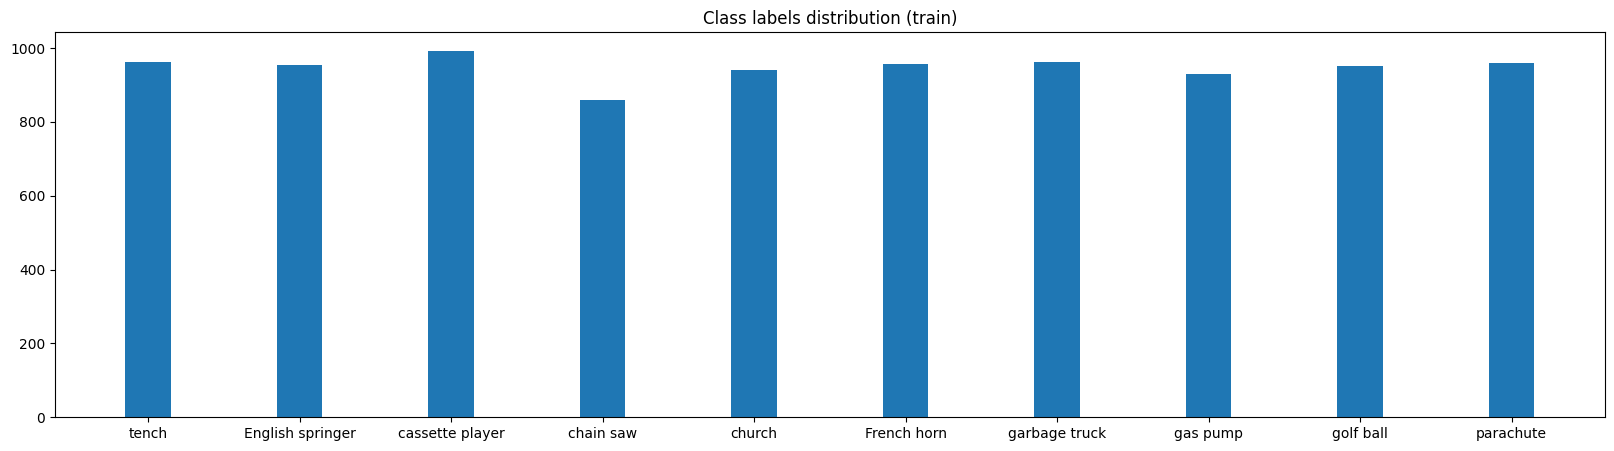

In [27]:
### Description ###

# Number of samples for each set
print("Number of train samples: ", len(imagenette_train))
print("Number of validation samples: ", len(imagenette_val))

# Class labels
label_names = [cls[0] for cls in imagenette_train.classes]
print(f"\nClass labels: {label_names}\n")

# Class labels distribution
labels = [label for _, label in imagenette_train]
_, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(label_names, counts.data))
plt.figure(figsize=(20, 5))
plt.bar(label_counts.keys(), label_counts.values(), width=0.3)
plt.title("Class labels distribution (train)")
plt.show()

The plot shows the number of samples from each class is similar, the only one that stands out to us is chain saw which is lower than the others but not by that much(relatively), so we think the classes are balanced.

# EX2 - Pretrained models (20pts)

1. Choose 2 models from ```torchvision.models``` ([link](https://pytorch.org/vision/stable/models.html)) that were pretrained on ImageNet. The third model is one of ResNet18/34/50 (the other models can't other ResNet variation).
2. Use ```torch-summary``` to summarize each model for an input of shape ```1x3x224x224```.
3. Describe each model in 2-4 lines. Think carefully what information might be relevant for this homework assignment (see EX3-EX4). It is recommended to read the paper in which each model was first presented but it is not required. You are, however, required to go over model's description in torchvision documentation (see the information tab for ResNet18 for an example [link](https://pytorch.org/vision/0.19/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18) )
4. Summarize the similarities and difference between the 3 models.

## ConvNext-Tiny

In [49]:
### ConvNext-Tiny Summary ###

summary(models.convnext_tiny(weights=models.ConvNeXt_Tiny_Weights.IMAGENET1K_V1), input_size=(1, 3, 224, 224), col_names=["input_size", "output_size", "kernel_size", "num_params"])


Layer (type:depth-idx)                        Input Shape               Output Shape              Kernel Shape              Param #
ConvNeXt                                      [1, 3, 224, 224]          [1, 1000]                 --                        --
├─Sequential: 1-1                             [1, 3, 224, 224]          [1, 768, 7, 7]            --                        --
│    └─Conv2dNormActivation: 2-1              [1, 3, 224, 224]          [1, 96, 56, 56]           --                        --
│    │    └─Conv2d: 3-1                       [1, 3, 224, 224]          [1, 96, 56, 56]           [4, 4]                    4,704
│    │    └─LayerNorm2d: 3-2                  [1, 96, 56, 56]           [1, 96, 56, 56]           --                        192
│    └─Sequential: 2-2                        [1, 96, 56, 56]           [1, 96, 56, 56]           --                        --
│    │    └─CNBlock: 3-3                      [1, 96, 56, 56]           [1, 96, 56, 56]           --  

### Description
ConvNext-Tiny uses Conv2d layers for downsampling, going from 96x56x56 to 192x28x28 to 384x14x14 to a final feature map of 768x7x7, and a final flattened embedding vector of size 768 after global average pooling.
Between the downampling convolutions there are LayerNorms and ConvNext blocks which are composed of 7x7 depthwise convolutions and 2 Linear layers.

## VisionTransformer

In [50]:
### ViT-B/16 Summary ###

summary(models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1), input_size=(1, 3, 224, 224), col_names=["input_size", "output_size", "kernel_size", "num_params"])

Layer (type:depth-idx)                        Input Shape               Output Shape              Kernel Shape              Param #
VisionTransformer                             [1, 3, 224, 224]          [1, 1000]                 --                        768
├─Conv2d: 1-1                                 [1, 3, 224, 224]          [1, 768, 14, 14]          [16, 16]                  590,592
├─Encoder: 1-2                                [1, 197, 768]             [1, 197, 768]             --                        151,296
│    └─Dropout: 2-1                           [1, 197, 768]             [1, 197, 768]             --                        --
│    └─Sequential: 2-2                        [1, 197, 768]             [1, 197, 768]             --                        --
│    │    └─EncoderBlock: 3-1                 [1, 197, 768]             [1, 197, 768]             --                        7,087,872
│    │    └─EncoderBlock: 3-2                 [1, 197, 768]             [1, 197, 768]   

### Description
ViT-B/16 uses a 16x16 convolution with 16 stride to split the input image into 16x16 patches, then transforms each patch into tokens of size 768. The 196 tokens are grouped with a cls token in a 197x768 matrix. This matrix is passed as input to 12 Transformer Encoder blocks which are composed of Nomalization, Multi-Head Self-Attention, and 2 Linear layers, and keep the dimensions the same. Classification is done at the end using a Linear layer with the learned cls token as the embedding.

## ResNet18

In [53]:
### ResNet18 Summary ###

summary(models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1), input_size=(1, 3, 224, 224), col_names=["input_size", "output_size", "kernel_size", "num_params"], depth=4)

Layer (type:depth-idx)                   Input Shape               Output Shape              Kernel Shape              Param #
ResNet                                   [1, 3, 224, 224]          [1, 1000]                 --                        --
├─Conv2d: 1-1                            [1, 3, 224, 224]          [1, 64, 112, 112]         [7, 7]                    9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         [1, 64, 112, 112]         --                        128
├─ReLU: 1-3                              [1, 64, 112, 112]         [1, 64, 112, 112]         --                        --
├─MaxPool2d: 1-4                         [1, 64, 112, 112]         [1, 64, 56, 56]           3                         --
├─Sequential: 1-5                        [1, 64, 56, 56]           [1, 64, 56, 56]           --                        --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           [1, 64, 56, 56]           --                        --
│    │    └─Con

### Description
ResNet18 begins with a 7x7 Convolution and continues with 8 BasicBlocks which are composed of 2 groups of 3x3 convolution, BatchNorm and ReLU, sometimes with another 1x1 convolution in the end for downsampling, with skip connections between the blocks. The downsampling ends with a 512x7x7 feature map and after global average pooling we end up with an embedding vector of size 512.

## Model similarities and differences
1. Architecture type - ResNet18 and ConvNext-Tiny are CNN's, while ViT-B/16 is a transformer model that uses self-attention layers instead of convolutional layers
2. Embeddings - All 3 models produce an embedding vector in the end and can be used as a backbone for image classification.
3. Representation - In the ResNet18 and ConvNext-Tiny architectures each block produces a feature map, while the Vit-B/16 produces a token sequence after each Encoder block.
4. Parameters - Vit-B/16 has 86 Million parameters, way more than ResNet18 and ConvNext-Tiny.

# EX3 - Visualizing feature maps (30pts)
In this section you will visualize the feature maps learned by your chosen models.


*   In a convoultion-based models (i.e., ResNet, ConvNext), use the final conv block. If the image resolution is too small do to maxpooling operations, you may choose a different block.
*   In a vision transformer (ViT), use model output without the cls token (if relevant).

Assignments:


1.   Describe the feature map shape for an input image of shape ```1x3x224x224``` (i.e., ```1x512xHxW``` for some model).
2. Choose 1 class from Imagenette and sample 10 random images.
3. Extract the feature maps from each model and perform PCA on the channel dim and reduce it to 3. The output should be of size ```10x3xHxW```
4. Resize the features to 112x112 and plot the images for each model (3 row x 10 columns)
5. Summarize the similarities and difference between the 3 models according to the PCA for the features you have presented.





# EX4 - K-Nearest Neighbors (KNN) in the Embedding Space (50pts)
Also know ans "few-shot/ Zero-shot learning".
Perform KNN classification using the feature vectors from each of the 3 models between the train and test set of Imagenette.


## Visualizing the embedding layer distribution.
* Write an ```extract_embedding(dataloader, model, model_name)``` function that takes in a dataloader and a model and return the ```N x Num_features``` matrix for that set. Make sure that shuffle is off.
* You may write different condition for different models. I.e., the embedding in a ViT model is the ```CLS``` token.

* Plot the t-SNE of the train set for each of the 3 models. Color label the points according to the class labels (see t-SNE implementation by sklearn).

* Write a 2-3 lines disscussion about the data distribution of each model and their comparison.


## Build a KNN ```class``` with the following methods:


*   ```init()```: takes the num_classes and other useful information.
* ```extract_embedding(X, model)```: Extracts the embedding vector for the entire train set using the model. X_features should be ```Nxnum_ft```. Call the function from the previous section.

*   ```fit(X_train, y_train, model)```: Extracts the embedding vector for the entire train set using the ```extract_embedding()``` method and stores it as ```self.X_train_ft``` and ```self.y_labels``` (the labels from the train set).  


*   ```predict(X_test, model, n_neighbors)```: Extracts the embedding vector for the entire train set using the ```extract_embedding()``` method and performs KNN for a given K. Returns the predicted_labels.
* ```compute_accuracy(y_true, y_pred)```.


## Compare the KNN accuracy
using each of the 3 models for $K\in[1,3,5 ]$ and report the results in a table or a graph. Summarize the results in 2-4 lines.
